<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day3/DL_Vgg16_demo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 經典神經網路學習遷移式學習

<center><img src="https://media.giphy.com/media/zpHiDF3I7a8ytMxrNC/giphy.gif" width="50%"></center>

# 一、設定環境與取得資料集

## 1.複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



## 2.使用GPU

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/4.png" width=80%>
      </center>
      <center><font size="6">Step 4<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/5.png" width=80%>
      </center>
      <center>
        <font size="6">Step 5<br /><br /></font>
      </center> 
    </td>
  </tr>
</table>



## 3.Kaggle下載資料集

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a49939126bcb2f633b5197055d1946fc8d4bb7ef/img/6.png" width=100%>
      </center><br />
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a49939126bcb2f633b5197055d1946fc8d4bb7ef/img/7.png" width=100%>
      </center>
      <center><font size="6">Step 6<br /></font>
          <font size="4"><br />點擊後將產生一次性的kaggle.json檔案</font>
          <font size="4"><br /><br />後續載入dataset需要這個檔案<br /><br /></font>
      </center>
    </td>
  </tr>
</table>

## 4.上傳kaggle.json到雲端
創一個root/.kaggle資料夾  
把kaggle.json丟進去  
再來就可以下載資料集了

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
cd

/root


In [3]:
!mkdir .kaggle

In [4]:
cd ../root/.kaggle

/root/.kaggle


In [5]:
!cp ../../content/kaggle.json -d .

In [6]:
! pip install -q kaggle

In [7]:
!kaggle competitions download -c dogs-vs-cats

 99% 269M/271M [00:04<00:00, 60.9MB/s]
100% 271M/271M [00:04<00:00, 62.1MB/s]
 99% 538M/543M [00:04<00:00, 140MB/s]
100% 543M/543M [00:04<00:00, 141MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 83.5MB/s]


In [8]:
!mkdir /content/input

In [9]:
!mkdir /content/input/dogs-vs-cats/

In [10]:
!cp sampleSubmission.csv test1.zip train.zip -d "/content/input/dogs-vs-cats"

In [11]:
cd /content

/content


## 5.確認安裝環境

In [12]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1238160189828229345
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7252803584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11168229484341977315
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [13]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.6.0
Keras version: 2.6.0


In [14]:
!python -V
platform.python_version()

Python 3.7.11


'3.7.11'

In [15]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [16]:
import warnings
warnings.filterwarnings("ignore")

# 二、資料預處理



## 1.載入資料

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [119]:
import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/input/dogs-vs-cats/test1.zip
/content/input/dogs-vs-cats/sampleSubmission.csv
/content/input/dogs-vs-cats/train.zip


In [120]:
import zipfile
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD

import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

解壓縮檔案

In [121]:
def extract_files(source_path, target_path):
    zip_ref = zipfile.ZipFile(source_path,'r')
    zip_ref.extractall(target_path)
    zip_ref.close()

In [122]:
#extract_files('/content/input/dogs-vs-cats/test1.zip','/content/working/')
extract_files('/content/input/dogs-vs-cats/train.zip','/content/working/')

資料夾路徑  
資料筆數


Populating the interactive namespace from numpy and matplotlib
cat.10697.jpg
(429, 499, 3)


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


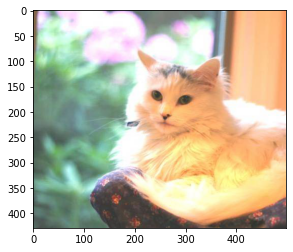

In [123]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames = os.listdir(r"/content/working/train/")
sample = random.choice(filenames)
print(sample)

img=mpimg.imread('/content/working/train/' + sample)

#print(type(img))
print(img.shape)

imgplot = plt.imshow(img)
plt.show()

## 2.建立檔案路徑

cat: label 0  
dog: label 1

In [134]:
%pwd

'/content'

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix

In [136]:
cat_paths = glob.glob("working/train/cat.*.jpg")

catdf = pd.DataFrame(columns=["path", "target"])
catdf["path"] = cat_paths
catdf["target"] = 'cat'


dog_paths = glob.glob("working/train/dog.*.jpg")

dogdf = pd.DataFrame(columns=["path", "target"])
dogdf["path"] = dog_paths
dogdf["target"] = 'dog'

traindf = pd.concat([catdf, dogdf], ignore_index=True)

In [137]:
catdf.head()

,path,target
0,working/train/cat.6140.jpg,cat
1,working/train/cat.5395.jpg,cat
2,working/train/cat.10994.jpg,cat
3,working/train/cat.5242.jpg,cat
4,working/train/cat.7811.jpg,cat


In [138]:
dogdf.head()

,path,target
0,working/train/dog.1448.jpg,dog
1,working/train/dog.7039.jpg,dog
2,working/train/dog.6744.jpg,dog
3,working/train/dog.8902.jpg,dog
4,working/train/dog.8199.jpg,dog


In [139]:
traindf

,path,target
0,working/train/cat.6140.jpg,cat
1,working/train/cat.5395.jpg,cat
2,working/train/cat.10994.jpg,cat
3,working/train/cat.5242.jpg,cat
4,working/train/cat.7811.jpg,cat
...,...,...
24995,working/train/dog.10368.jpg,dog
24996,working/train/dog.3477.jpg,dog
24997,working/train/dog.10254.jpg,dog
24998,working/train/dog.10442.jpg,dog


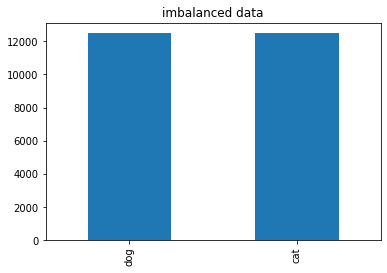

In [140]:
counts_sample = pd.value_counts(traindf['target'], sort = False)
counts_sample.plot(kind ='bar')
plt.title('imbalanced data')
#plt.savefig('3.png')
plt.show()

In [141]:
cat_number = len(traindf[traindf['target'] =='cat'])
dog_number = len(traindf[traindf['target'] =='dog'])
print('cat: ', cat_number)
print('dog: ', dog_number)

total_number = dog_number + cat_number
cat_percent = round((cat_number / total_number)*100, 2)
dog_percent = round((dog_number / total_number)*100, 2)

print('Class cat 百分比 = ', cat_percent,'%')
print('Class dog 百分比 = ', dog_percent,'%')

cat:  12500
dog:  12500
Class cat 百分比 =  50.0 %
Class dog 百分比 =  50.0 %


In [142]:
cat_index = traindf[traindf['target'] == 'cat'].index
dog_index = traindf[traindf['target'] == 'dog'].index

In [143]:
sample_num = 1500 #訓練集用隨機種子取樣，每類1500張
random_cat_index = np.random.choice(cat_index, sample_num, replace=False)
random_dog_index = np.random.choice(dog_index, sample_num, replace=False)

In [144]:
indexs = np.concatenate([random_cat_index, random_dog_index])
combined_data = traindf.iloc[indexs,:]
combined_data

,path,target
4107,working/train/cat.8139.jpg,cat
6718,working/train/cat.6134.jpg,cat
4322,working/train/cat.106.jpg,cat
1894,working/train/cat.5850.jpg,cat
10931,working/train/cat.11991.jpg,cat
...,...,...
16559,working/train/dog.1897.jpg,dog
24466,working/train/dog.7465.jpg,dog
23867,working/train/dog.8792.jpg,dog
24628,working/train/dog.133.jpg,dog


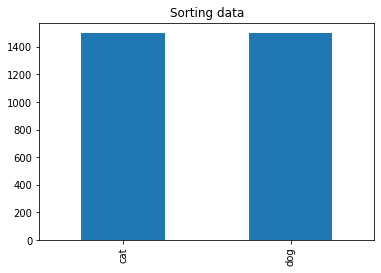

In [145]:
counts_sample = pd.value_counts(combined_data['target'], sort = False)
counts_sample.plot(kind ='bar')
plt.title('Sorting data')
#plt.savefig('4.png')
plt.show()

In [146]:
cat_number = len(combined_data[combined_data['target'] =='cat'])
dog_number = len(combined_data[combined_data['target'] =='dog'])
print('cat: ', cat_number)
print('dog: ', dog_number)

total_number = dog_number + cat_number
cat_percent = round((cat_number / total_number)*100, 2)
dog_percent = round((dog_number / total_number)*100, 2)

print('Class cat 百分比 = ', cat_percent,'%')
print('Class dog 百分比 = ', dog_percent,'%')

cat:  1500
dog:  1500
Class cat 百分比 =  50.0 %
Class dog 百分比 =  50.0 %


## 3.切割資料
sklearn split train validation test
```

>> 計算每次訓練
    >> 分割中的圖片數量（訓練/驗證/測試）：
        >> training split (train/validation/test):

```

In [147]:
# Step1.1 處理圖片
x_ = np.array(combined_data["path"])
y_ = np.array(combined_data["target"])

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split( x_,
                              y_,
                              test_size=0.2,
                              random_state=42)
x_val, x_test, y_val, y_test = train_test_split( x_temp,
                              y_temp,
                              test_size=0.1,
                              random_state=42)

In [149]:
print('train: ',x_train.shape, y_train.shape)
print('val  : ',x_val.shape, y_val.shape)
print('test : ',x_test.shape, y_test.shape)

train:  (2400,) (2400,)
val  :  (540,) (540,)
test :  (60,) (60,)


In [150]:
train_list = pd.DataFrame(columns=["path", "label"])
train_list["path"] = x_train
train_list["label"] = y_train
train_list

,path,label
0,working/train/cat.3205.jpg,cat
1,working/train/cat.11590.jpg,cat
2,working/train/cat.3090.jpg,cat
3,working/train/dog.504.jpg,dog
4,working/train/cat.11169.jpg,cat
...,...,...
2395,working/train/dog.7315.jpg,dog
2396,working/train/cat.10892.jpg,cat
2397,working/train/cat.8154.jpg,cat
2398,working/train/cat.5464.jpg,cat


In [151]:
val_list = pd.DataFrame(columns=["path", "label"])
val_list["path"] = x_train
val_list["label"] = y_train
val_list

,path,label
0,working/train/cat.3205.jpg,cat
1,working/train/cat.11590.jpg,cat
2,working/train/cat.3090.jpg,cat
3,working/train/dog.504.jpg,dog
4,working/train/cat.11169.jpg,cat
...,...,...
2395,working/train/dog.7315.jpg,dog
2396,working/train/cat.10892.jpg,cat
2397,working/train/cat.8154.jpg,cat
2398,working/train/cat.5464.jpg,cat


In [152]:
test_list = pd.DataFrame(columns=["path", "label"])
test_list["path"] = x_test
test_list["label"] = y_test
test_list

,path,label
0,working/train/dog.11086.jpg,dog
1,working/train/cat.10774.jpg,cat
2,working/train/dog.751.jpg,dog
3,working/train/dog.9714.jpg,dog
4,working/train/dog.11410.jpg,dog
5,working/train/cat.12195.jpg,cat
6,working/train/dog.12224.jpg,dog
7,working/train/dog.6112.jpg,dog
8,working/train/dog.1468.jpg,dog
9,working/train/cat.7733.jpg,cat


In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_list['label'])
print(list(le.classes_))

train_list['label'] = le.transform(train_list['label'])

le.fit(val_list['label'])
val_list['label'] = le.transform(val_list['label'])

le.fit(test_list['label'])
test_list['label'] = le.transform(test_list['label'])

['cat', 'dog']


In [154]:
train_list
#val_list
#test_list

,path,label
0,working/train/cat.3205.jpg,0
1,working/train/cat.11590.jpg,0
2,working/train/cat.3090.jpg,0
3,working/train/dog.504.jpg,1
4,working/train/cat.11169.jpg,0
...,...,...
2395,working/train/dog.7315.jpg,1
2396,working/train/cat.10892.jpg,0
2397,working/train/cat.8154.jpg,0
2398,working/train/cat.5464.jpg,0


In [155]:
train_list['label']

0       0
1       0
2       0
3       1
4       0
       ..
2395    1
2396    0
2397    0
2398    0
2399    0
Name: label, Length: 2400, dtype: int64

In [156]:
train_list['label']=train_list['label'].astype(str)
val_list['label']=val_list['label'].astype(str)
test_list['label']=test_list['label'].astype(str)

In [157]:
train_list
#val_list
#test_list

,path,label
0,working/train/cat.3205.jpg,0
1,working/train/cat.11590.jpg,0
2,working/train/cat.3090.jpg,0
3,working/train/dog.504.jpg,1
4,working/train/cat.11169.jpg,0
...,...,...
2395,working/train/dog.7315.jpg,1
2396,working/train/cat.10892.jpg,0
2397,working/train/cat.8154.jpg,0
2398,working/train/cat.5464.jpg,0


In [158]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    horizontal_flip=True,
                    vertical_flip=False,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = "nearest",
                    rescale=1./255
                    #preprocessing_function=preprocess_input
                  )
valid_datagen = ImageDataGenerator(
                    rescale=1./255
                    #preprocessing_function=preprocess_input
                  )
test_datagen = ImageDataGenerator(
                    rescale=1./255
                  )

In [159]:
data_path = "./"
img_shape=(150, 150)
batch_size=30

In [160]:
train_generator = train_datagen.flow_from_dataframe(
                            dataframe=train_list,
                            directory=data_path,
                            x_col='path',
                            y_col='label',
                            target_size=img_shape,
                            batch_size=batch_size,
                            class_mode='categorical'
                            )
valid_generator = valid_datagen.flow_from_dataframe(
                            dataframe=val_list,
                            directory=data_path,
                            x_col='path',
                            y_col='label',
                            target_size=img_shape,
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=False
                            )
test_generator = test_datagen.flow_from_dataframe(
                            dataframe=test_list,
                            directory=data_path,
                            x_col='path',
                            y_col='label',
                            target_size=img_shape,
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=False
                            )


Found 2400 validated image filenames belonging to 2 classes.
Found 2400 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


## 4.Model

### Fine-turn

#### 使用預訓練模型

In [161]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [162]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

#### Model define

In [163]:
model2 = models.Sequential()                       # 產生一個新的網絡模型結構
model2.add(conv_base)                              # 把預訓練的卷積基底疊上去
model2.add(layers.Flatten())                       # 打平
model2.add(layers.Dense(256, activation='relu'))   # 疊上新的密集連接層來做為分類器
model2.add(layers.Dense(2, activation='softmax'))  # 因為資料集只有 - 兩類(Cat & Dog)

In [172]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [164]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [165]:
conv_base.trainable = False

In [166]:
for layer in conv_base.layers:
    print("{}: {}".format(layer.name, layer.trainable))

input_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: False
block5_conv2: False
block5_conv3: False
block5_pool: False


In [40]:
print(len(conv_base.trainable_weights))
print(len(model2.trainable_weights))

0
4


In [171]:
conv_base.trainable = True # 解凍 "卷積基底"

# 所有層 - 直到 block4_pool - 都應該被凍結，而 block5_conv1，block5_conv2, block5_conv3 及 block5_pool- 被解凍 

layers_frozen = ['block5_conv1','block5_conv2', 'block5_conv3', 'block5_pool']
for layer in conv_base.layers:
    if layer.name in layers_frozen:
        layer.trainable = True
    else:
        layer.trainable = False
        
# 每一層是否可以被 - trainable - 的 flat - 列印出來

for layer in conv_base.layers:
    print("{}: {}".format(layer.name, layer.trainable)) 

input_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True


```

- 可以開始微調 - 網絡
    - 將使用非常低的學習率(Learning Rate) 使用 RMSprop 優化器
    - 使用低學習率的原因
        - 希望限制對進行微調的3個卷積層表示(Representation) - 所做的修改的大小幅度
        - 太大的更新
            - 可能會損害這些 - 表示(Representations)

```

In [42]:
from tensorflow.keras import optimizers

In [43]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
earlystop = callbacks.EarlyStopping(monitor='val_loss',
                    patience=3,
                    verbose=1)
model_dir = './model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('vgg16')
model_mckp = callbacks.ModelCheckpoint(modelfiles,
                     monitor='val_accuracy',
                     save_best_only=True)
callbacks_list = [model_mckp, earlystop]

調整參數(訓練用):
```
>> 學習率eta: 
  ex: lr = 0.0001

  lr = 小數

>> 損失函數loss:

  ex: loss = 'binary_croossentropy'

  binary_crossentropy
  binary_crossentropy
  mse
  categorical_crossentropy

>> 優化器opt:
  ex: opt = optimizers.RMSprop(lr=eta)

  optimizers.SGD(lr=lr, momentum=0.9)
  optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

>> 迭代次數epoch:要訓練幾次
  ex: epoch = 10
  
```

#### Hyperparameters config.

In [174]:
lr = 1e-4
epoch = 30
batch_size = 20
optimizer = tf.keras.optimizers.Adam(lr)
model2.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=["accuracy"])

#### Training

In [175]:
history = model2.fit(train_generator,
            epochs = epoch,
            batch_size = batch_size,
            validation_data = valid_generator,
            verbose = 2,
            callbacks = callbacks_list)

Epoch 1/30
80/80 - 28s - loss: 0.4115 - accuracy: 0.8062 - val_loss: 0.2088 - val_accuracy: 0.9183
Epoch 2/30
80/80 - 26s - loss: 0.3004 - accuracy: 0.8700 - val_loss: 0.1765 - val_accuracy: 0.9350
Epoch 3/30
80/80 - 27s - loss: 0.2291 - accuracy: 0.9054 - val_loss: 0.1269 - val_accuracy: 0.9467
Epoch 4/30
80/80 - 28s - loss: 0.2125 - accuracy: 0.9054 - val_loss: 0.0974 - val_accuracy: 0.9638
Epoch 5/30
80/80 - 26s - loss: 0.1981 - accuracy: 0.9179 - val_loss: 0.0842 - val_accuracy: 0.9708
Epoch 6/30
80/80 - 27s - loss: 0.1698 - accuracy: 0.9300 - val_loss: 0.0615 - val_accuracy: 0.9800
Epoch 7/30
80/80 - 27s - loss: 0.1589 - accuracy: 0.9333 - val_loss: 0.0983 - val_accuracy: 0.9600
Epoch 8/30
80/80 - 26s - loss: 0.1303 - accuracy: 0.9513 - val_loss: 0.0597 - val_accuracy: 0.9771
Epoch 9/30
80/80 - 28s - loss: 0.1319 - accuracy: 0.9458 - val_loss: 0.0541 - val_accuracy: 0.9808
Epoch 10/30
80/80 - 26s - loss: 0.1135 - accuracy: 0.9529 - val_loss: 0.0506 - val_accuracy: 0.9804
Epoch 11/

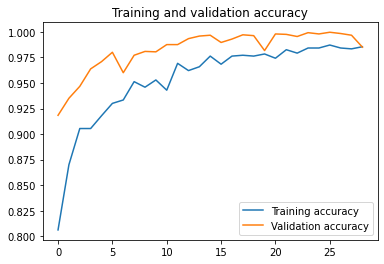

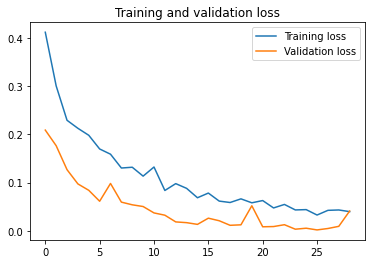

In [176]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [177]:
def num_steps_per_epoch(data_generator, batch_size):
    if data_generator.n % batch_size==0:
        return data_generator.n//batch_size
    else:
        return data_generator.n//batch_size + 1

#### Predict

In [178]:
test_steps = num_steps_per_epoch(test_generator, batch_size)

In [179]:
test_loss, test_acc = model2.evaluate(test_generator, steps=test_steps)
print('test acc:', test_acc)

2/2 [==============================] - 0s 102ms/step - loss: 0.2957 - accuracy: 0.9667
test acc: 0.9666666388511658


In [180]:
y_predict = model2.predict(test_generator, steps=test_steps)
y_predict_argmax = np.argmax(y_predict, axis=1)

In [181]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_list["label"].values.astype(np.int_), y_predict_argmax)
cm

array([[27,  2],
       [ 0, 31]])

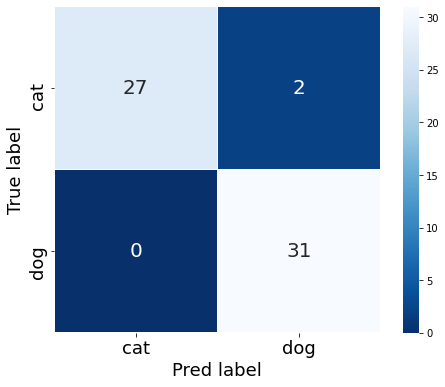

In [182]:
import seaborn as sns
import pandas as pd

target_names = list(le.classes_)
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(conf_m, annot=True, annot_kws={"size": 20},
            cmap='Blues_r', fmt='g', linewidth=0.5, square=True)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Pred label', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

In [183]:
from sklearn.metrics import classification_report
target_names=list(le.classes_)
report = classification_report(test_list["label"].values.astype(np.int_), y_predict_argmax, target_names=target_names)
print(report)

              precision    recall  f1-score   support

         cat       1.00      0.93      0.96        29
         dog       0.94      1.00      0.97        31

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('./model-logs/{}-best-model.h5'.format('vgg16'))

In [184]:
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing import image 
import cv2
def plot_image(i, predictions_array, true_label, img, img_id):
  #true_label, img = true_label[i], img[i]
  true_label = true_label
  img = img
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({}) \nid: ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label],
                                img_id),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def wrong_one_show(y_predict, y_test, test_generator, x_test):
  num_rows = 5
  num_cols = 1
  num_images = num_rows*num_cols
  case = 2
  plt.figure(figsize=(case*case*num_cols, case*num_rows))
  class_names = target_names
  pred_wr = []
  test_wr = []
  img_wr = []
  img_path = []
  img_id = []
  for i in range(len(y_test)):
    if np.argmax(y_predict[i])!= y_test[i]:
      pred_wr.append(y_predict[i])
      test_wr.append(y_test[i])
      img_wr.append(test_generator[0][0][i])
      img_path.append(x_test[i])
      img_id.append(i)
    pred_wrr = np.array(pred_wr)
    test_wrr = np.array(test_wr)
    img_wrr = np.array(img_wr)
    img_pathh = np.array(img_path)
    img_idd = np.array(img_id)
    #print(img_idd)
  for i in range(len(pred_wrr)):
    plt.subplot(num_rows, case*num_cols, case*i+1)
    plot_image(i, pred_wrr[i], test_wrr[i], img_wrr[i], img_idd[i])
    plt.subplot(num_rows, case*num_cols, case*i+2)
    plot_value_array(i, pred_wrr[i],  test_wrr[i])
    #plt.subplot(num_rows, 3*num_cols, 3*i+3)
    #plot_gard_cam(i, img_pathh[i])
  plt.tight_layout()
  plt.show()

In [185]:
y_testt=test_list["label"].values.astype(np.int_)

In [186]:
test_generator1 = test_datagen.flow_from_dataframe(
                            dataframe=test_list,
                            directory=data_path,
                            x_col='path',
                            y_col='label',
                            target_size=img_shape,
                            batch_size=len(y_test),
                            class_mode='categorical',
                            shuffle=False
                            )

Found 60 validated image filenames belonging to 2 classes.


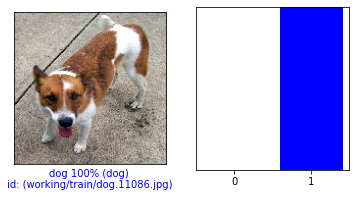

In [187]:
i = 0
class_names = target_names
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_predict[i], y_testt[i], test_generator[0][0][i], x_test[i])
plt.subplot(1,2,2)
plot_value_array(i, y_predict[i],  y_testt[i])
plt.show()

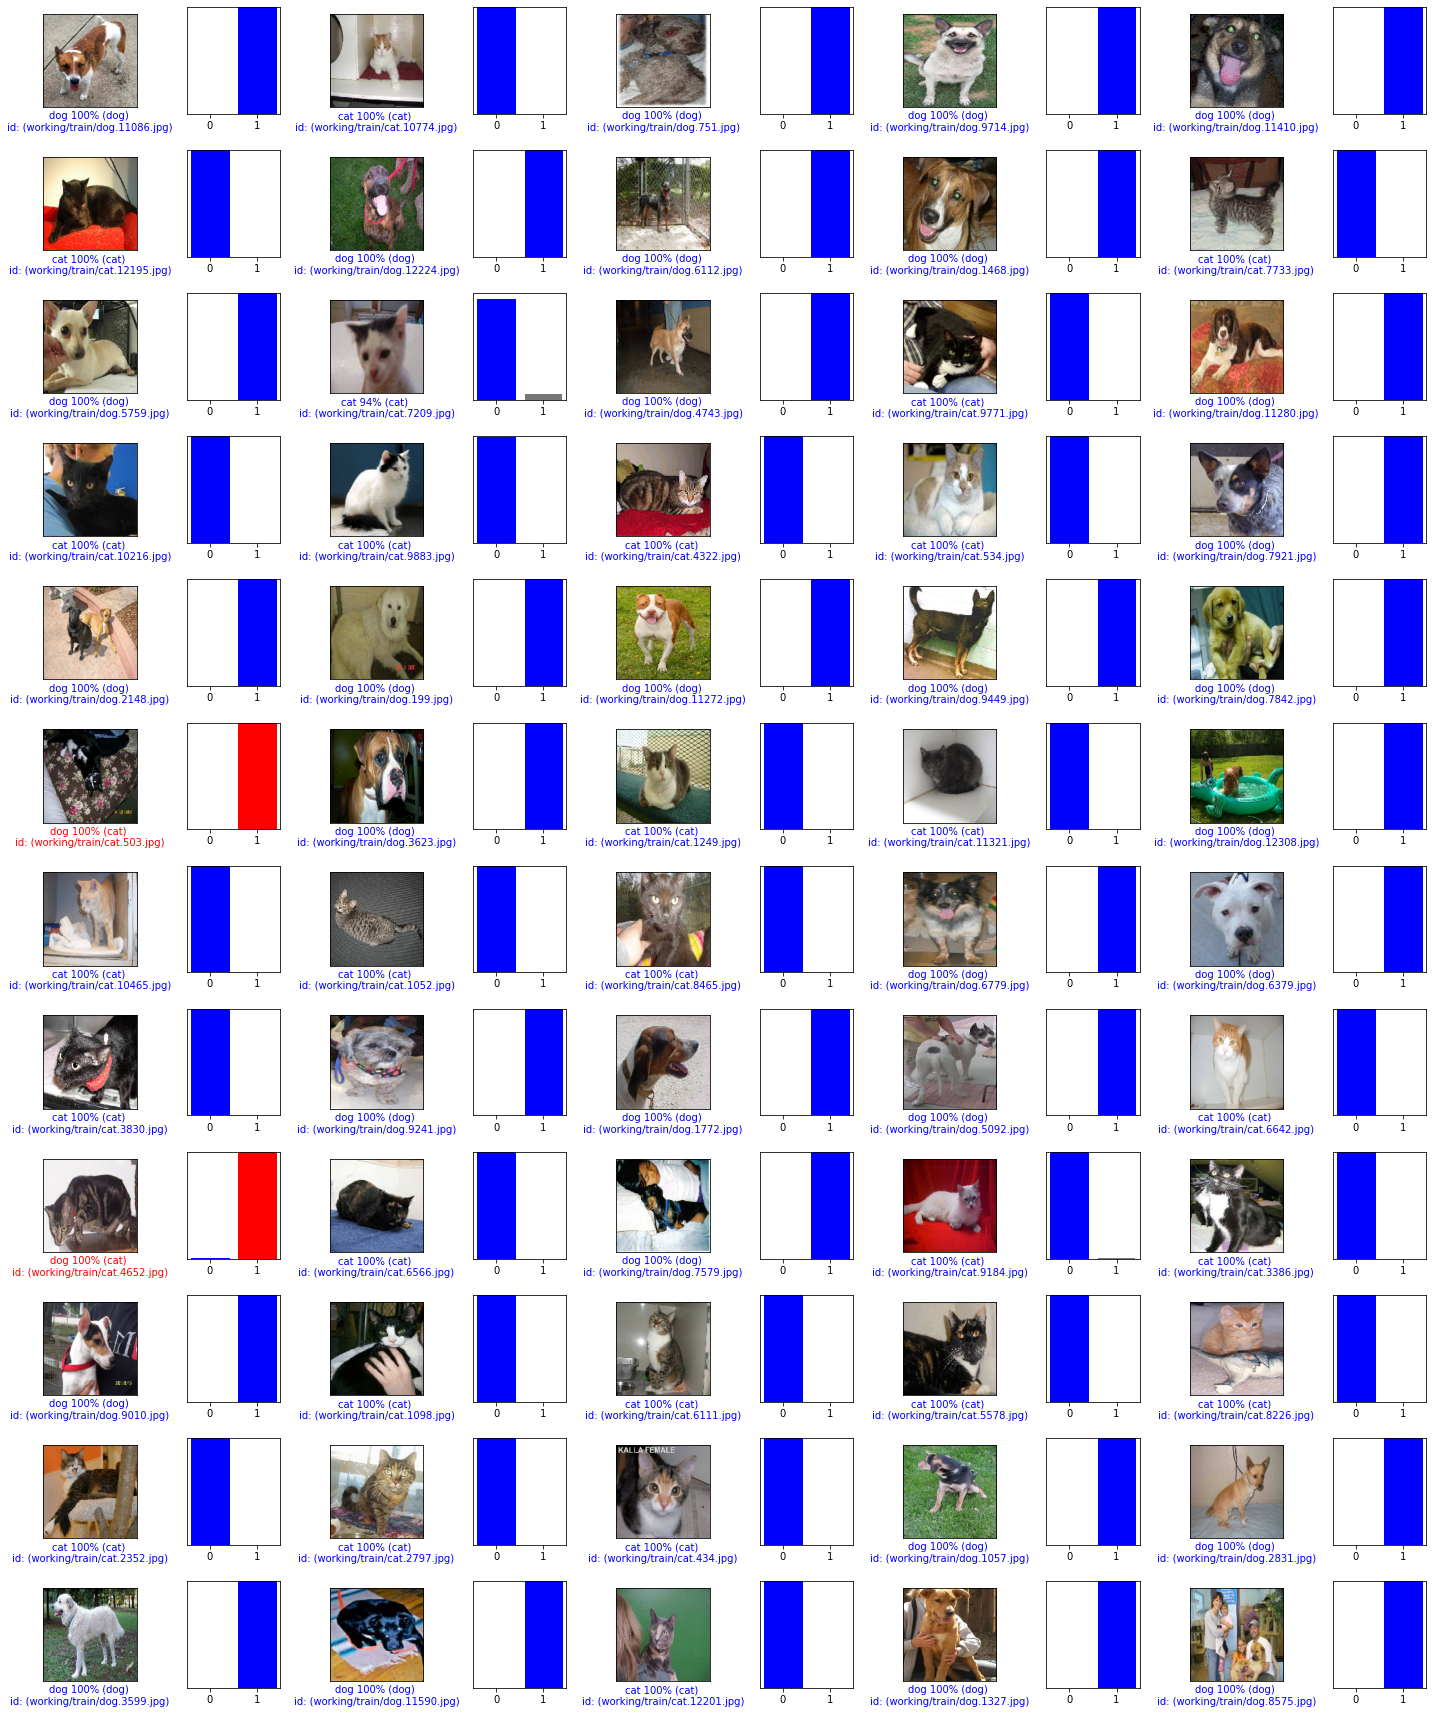

In [188]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 12
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
class_names = target_names

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_predict[i], y_testt[i], test_generator1[0][0][i], x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_predict[i],  y_testt[i])
plt.tight_layout()
plt.show()

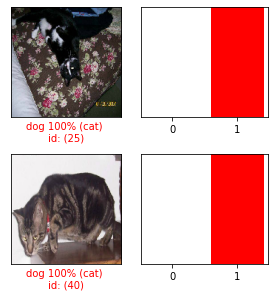

In [189]:
wrong_one_show(y_predict, y_testt, test_generator1, x_test)

#### Inference

In [195]:
from google.colab import files
uploaded = files.upload()

Saving images.jpg to images.jpg


In [198]:
#image_path = './working/train/dog.100.jpg'
image_path = './images.jpg'
image_shape = (150, 150)
cat_or_dog = 'dog'

In [199]:
from tensorflow.keras.preprocessing import image
image_test = image.load_img(image_path, target_size=image_shape)
image_test_np = image.img_to_array(image_test)
print(image_test_np.shape)
image_test_np = np.expand_dims(image_test_np, axis=0)
print(image_test_np.shape)
#image_test_np = preprocess_input(image_test_np)

(150, 150, 3)
(1, 150, 150, 3)


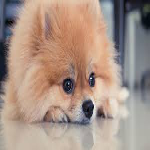

In [200]:
image_test

In [201]:
test_pred = model2.predict(image_test_np)
predicted_argmax = np.argmax(test_pred)

Q: Is is a  dog ?

AI: Yes it is!




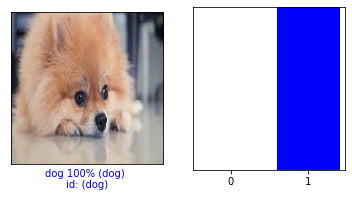

In [202]:
i = None
class_names = target_names

if cat_or_dog==target_names[0]:
  answer=np.array([0])
  print('Q: Is it a ',cat_or_dog,'?')
else:
  answer=np.array([1])
  print('Q: Is is a ',cat_or_dog,'?')

if predicted_argmax==answer:
  print('\nAI: Yes it is!\n\n')
else:
  print('\nAI: No. \n\n')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_pred[0], answer[0], image_test_np[0,:,:,:]/255, cat_or_dog)
plt.subplot(1,2,2)
plot_value_array(i, test_pred[0],  answer[0])
plt.show()

### From Scratch

#### Model define

In [168]:
r = 0.5
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(r))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(r))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(r))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(r))


model1.add(Flatten())
model1.add(Dropout(r))
model1.add(Dense(units = 512, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

In [169]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)      

In [ ]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model_1.png')
plot_model( 
      model1, 
      #to_file = 'model_2.png',
      show_shapes = True,
      show_layer_names = False,
      #rankdir='LR'
      )
#plot_model(model, to_file='model_3.png',rankdir='LR')
#plot_model(model, to_file='model_3.png',rankdir='LR',show_shapes=True,expand_nested=True)

#### Hyperparameters config.

In [ ]:
lr = 0.001
epoch = 30
batch_size = 30
opt = tf.keras.optimizers.Adam(lr)
model1.compile(loss='categorical_crossentropy', #'categorical_crossentropy'
              optimizer=opt, 
              metrics=["accuracy"])

#### Training

In [ ]:
history1 = model1.fit(
            train_generator,
            epochs = epoch,
            batch_size = batch_size,
            validation_data=valid_generator,
            verbose=2,
            #callbacks=callbacks_list
            )

Epoch 1/30
80/80 - 23s - loss: 0.7188 - accuracy: 0.5221 - val_loss: 0.6869 - val_accuracy: 0.5983
Epoch 2/30
80/80 - 22s - loss: 0.6858 - accuracy: 0.5496 - val_loss: 0.6728 - val_accuracy: 0.5738
Epoch 3/30
80/80 - 22s - loss: 0.6797 - accuracy: 0.5700 - val_loss: 0.6668 - val_accuracy: 0.5779
Epoch 4/30
80/80 - 23s - loss: 0.6688 - accuracy: 0.5842 - val_loss: 0.6596 - val_accuracy: 0.6375
Epoch 5/30
80/80 - 22s - loss: 0.6718 - accuracy: 0.5950 - val_loss: 0.6413 - val_accuracy: 0.6258
Epoch 6/30
80/80 - 23s - loss: 0.6678 - accuracy: 0.5942 - val_loss: 0.6168 - val_accuracy: 0.6621
Epoch 7/30
80/80 - 23s - loss: 0.6732 - accuracy: 0.5975 - val_loss: 0.6588 - val_accuracy: 0.6271
Epoch 8/30
80/80 - 22s - loss: 0.6689 - accuracy: 0.5908 - val_loss: 0.6450 - val_accuracy: 0.6304
Epoch 9/30
80/80 - 23s - loss: 0.6742 - accuracy: 0.5896 - val_loss: 0.6534 - val_accuracy: 0.6150
Epoch 10/30
80/80 - 23s - loss: 0.6613 - accuracy: 0.6108 - val_loss: 0.6340 - val_accuracy: 0.6325
Epoch 11/

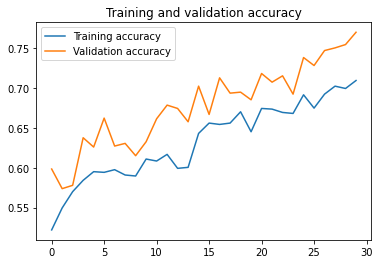

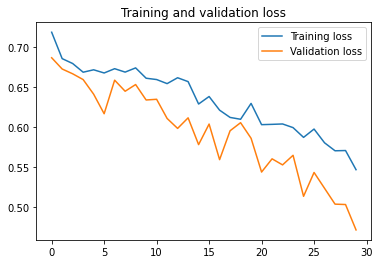

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def num_steps_per_epoch(data_generator, batch_size):
    if data_generator.n % batch_size==0:
        return data_generator.n//batch_size
    else:
        return data_generator.n//batch_size + 1

In [ ]:
test_steps = num_steps_per_epoch(test_generator, batch_size)

#### Predict

In [ ]:
test_loss, test_acc = model1.evaluate(test_generator, steps=test_steps)
print('test acc:', test_acc)

2/2 [==============================] - 0s 80ms/step - loss: 0.5809 - accuracy: 0.6500
test acc: 0.6499999761581421


In [ ]:
y_predict = model.predict(test_generator, steps=test_steps)
y_predict_argmax = np.argmax(y_predict, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(test_list["label"].values.astype(np.int_), y_predict_argmax)
cm

array([[28,  1],
       [ 1, 30]])

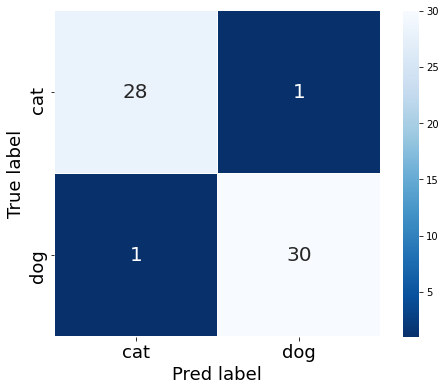

In [ ]:
import seaborn as sns
import pandas as pd

target_names = list(le.classes_)
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(conf_m, annot=True, annot_kws={"size": 20},
            cmap='Blues_r', fmt='g', linewidth=0.5, square=True)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Pred label', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=list(le.classes_)
report = classification_report(test_list["label"].values.astype(np.int_), y_predict_argmax, target_names=target_names)
print(report)

              precision    recall  f1-score   support

         cat       0.97      0.97      0.97        29
         dog       0.97      0.97      0.97        31

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# 模型 儲存 Model Save 
model.save('model1.h5') 

In [ ]:
from tensorflow.keras.models import load_model
#model = load_model('./model-logs/{}-best-model.h5'.format('vgg16'))

In [ ]:
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing import image 
import cv2
def plot_image(i, predictions_array, true_label, img, img_id):
  #true_label, img = true_label[i], img[i]
  true_label = true_label
  img = img
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({}) \nid: ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label],
                                img_id),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def wrong_one_show(y_predict, y_test, test_generator, x_test):
  num_rows = 5
  num_cols = 1
  num_images = num_rows*num_cols
  case = 2
  plt.figure(figsize=(case*case*num_cols, case*num_rows))
  class_names = target_names
  pred_wr = []
  test_wr = []
  img_wr = []
  img_path = []
  img_id = []
  for i in range(len(y_test)):
    if np.argmax(y_predict[i])!= y_test[i]:
      pred_wr.append(y_predict[i])
      test_wr.append(y_test[i])
      img_wr.append(test_generator[0][0][i])
      img_path.append(x_test[i])
      img_id.append(i)
    pred_wrr = np.array(pred_wr)
    test_wrr = np.array(test_wr)
    img_wrr = np.array(img_wr)
    img_pathh = np.array(img_path)
    img_idd = np.array(img_id)
    #print(img_idd)
  for i in range(len(pred_wrr)):
    plt.subplot(num_rows, case*num_cols, case*i+1)
    plot_image(i, pred_wrr[i], test_wrr[i], img_wrr[i], img_idd[i])
    plt.subplot(num_rows, case*num_cols, case*i+2)
    plot_value_array(i, pred_wrr[i],  test_wrr[i])
    #plt.subplot(num_rows, 3*num_cols, 3*i+3)
    #plot_gard_cam(i, img_pathh[i])
  plt.tight_layout()
  plt.show()

In [ ]:
y_testt=test_list["label"].values.astype(np.int_)

In [ ]:
test_generator1 = test_datagen.flow_from_dataframe(
                            dataframe=test_list,
                            directory=data_path,
                            x_col='path',
                            y_col='label',
                            target_size=img_shape,
                            batch_size=len(y_test),
                            class_mode='categorical',
                            shuffle=False
                            )

Found 60 validated image filenames belonging to 2 classes.


In [ ]:
i = 0
class_names = target_names
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_predict[i], y_testt[i], test_generator[0][0][i], x_test[i])
plt.subplot(1,2,2)
plot_value_array(i, y_predict[i],  y_testt[i])
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 12
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
class_names = target_names

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_predict[i], y_testt[i], test_generator1[0][0][i], x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_predict[i],  y_testt[i])
plt.tight_layout()
plt.show()

In [ ]:
wrong_one_show(y_predict, y_testt, test_generator1, x_test)

#### Inference

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
image_path = './working/train/dog.100.jpg'
image_shape = (150, 150)
cat_or_dog = 'dog'

In [ ]:
from tensorflow.keras.preprocessing import image
image_test = image.load_img(image_path, target_size=image_shape)
image_test_np = image.img_to_array(image_test)
print(image_test_np.shape)
image_test_np = np.expand_dims(image_test_np, axis=0)
print(image_test_np.shape)
#image_test_np = preprocess_input(image_test_np)

(150, 150, 3)
(1, 150, 150, 3)


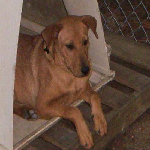

In [ ]:
image_test

In [ ]:
test_pred = model1.predict(image_test_np)
predicted_argmax = np.argmax(test_pred)

Q: Is is a  dog ?

AI: Yes it is!




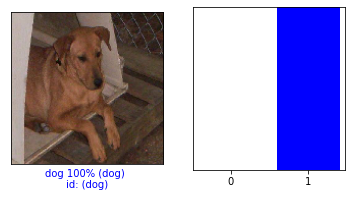

In [ ]:
i = None
class_names = target_names

if cat_or_dog==target_names[0]:
  answer=np.array([0])
  print('Q: Is it a ',cat_or_dog,'?')
else:
  answer=np.array([1])
  print('Q: Is is a ',cat_or_dog,'?')

if predicted_argmax==answer:
  print('\nAI: Yes it is!\n\n')
else:
  print('\nAI: No. \n\n')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_pred[0], answer[0], image_test_np[0,:,:,:]/255, cat_or_dog)
plt.subplot(1,2,2)
plot_value_array(i, test_pred[0],  answer[0])
plt.show()

# 三、補充：資料擴增
小幅度修改現有的樣本來產生更多的樣本，此方法在樣本數量不足時蠻有用的。  
做法：例如將圖片(水平/垂直)反轉/稍做縮放/位移/旋轉等變化，  
即可不斷產生新的相似圖片來訓練模型。  
當不重複的樣本數量變多時，即可讓模型學到更多樣化的資料，  
以減少過度擬合，並得到更好的普適性。

資料擴增範例

In [75]:
%pwd

'/content'

In [84]:
cd 

/root


In [86]:
!mkdir /content/aug/

In [88]:
!mkdir /content/aug/cat

In [89]:
!cp /content/working/train/cat.10097.jpg /content/aug/cat

In [90]:
a_dir = os.path.join('/content/aug/')
if not os.path.exists(a_dir): 
    os.mkdir(a_dir)

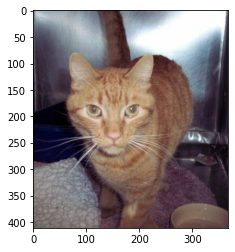

In [95]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/aug/cat/cat.10097.jpg')
imgplot = plt.imshow(img)

In [98]:
from keras.preprocessing.image import ImageDataGenerator

gobj = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

a = gobj.flow_from_directory(
        # 圖像資料 - 的目錄
        a_dir,
        # 設定圖像的 高( Height ) 與 寬( Width )
        target_size=(150, 150),
        batch_size=1,
        # 因為 - 目標資料集只有兩類(cat & dog)
        classes=['cat'],
        class_mode=None)


Found 1 images belonging to 1 classes.


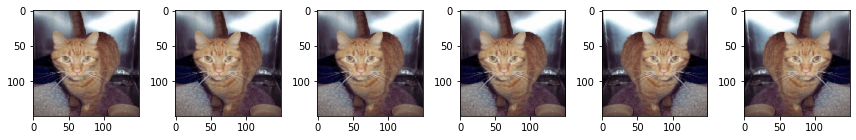

In [99]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(1, 6, i+1)
    for X_batch,  in a:
        image = X_batch
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()